# Machine Learning Notes
## Stanford Coursera Class
Week One - 4/7/2017

## Introduction

### Supervised Learning
Where the "right answers" are given.

For example:
* Housing prices based on square foot
* Stock market, volume of shares traded in a day
* Will it rain on a given day
* Based on tumor size, is it malignant or benign
* Is an author male or female based on previous works
* Final height and weight of a child based on historical data

Supervised learning problems are categorized into Regression and Classification problems.

#### Regression 
Problem where we are trying to predict a continuous value output. Mapping input variables onto a continuous function.

For example:
* How many items will sell over the next 3 months
* Predicting price of a house based on square footage.  Price is a function of size.
* Predicting a persons age based on a given picture

#### Classification
Problem where we are trying to predict a discrete valued output

For example:
* Predicting whether a house will sell for more (1) or less(0) than an asking price.
* Is the tumor malignant (1) or benign (0).
* Is the account hacked or not

A Learning algorithm can deal with an infinite number of attributes.



### Unsupervised Learning
* Data all has the same label.  "Here is the data set, can you find some structure in the data?"
* Allows you to approach a problem with little to no idea what the result should look like.
* Given a dataset, an algorithm may determine the data is clustered.  This is called a clustering algorithm.
* Non-clustering (aka Cocktail Party Algorithm) allows you to find structure in a chaotic environment.

#### Clustering Algorithm

For example:
* Google News.  Google looks at 1000's of stories and clusters them based on a theme.  ie BP oil spill
* DNA Microarray.  Grouping individuals based on whether a gene is present.  The algorithm is not told information about the people. 
* Social Network Analysis. Google groups identifies cohesive gorups of friends based on people you email the most.
* Market Segmentation.  Given customer data, but not what market segment the customer lies in.
* Astronomical Data Analysis.  

#### Cocktail Party
Clusters the signal received and tries to differentiate the sources.

?What are the variables it is using to compute this?


Cocktail party examples performed with a single line of code:

$[W,s,v] = svd((repmat(sum(x.*x,1)size(x,1),1).*x)*x')$

#### Octave
Software often implemented in octave first.  The algorithm svd() is simple in Octave as opposed to C++ or java.  In R, many of the ML techiques are already implemented at a high level reducing the learning opportunity.

## Model and Cost Function

### Model Representation

* Our first algorithm will be Linear Regression.

Notation:
* m   ~  Number of training examples
* $x^{(i)}$ ~ "Input" variable / features
* $y^{(i)}$ ~ "Output" variable / features
* $(x^{(i)},y^{(i)})$ ~ a training example
* $(x^{(i)},y^{(i)}); i=1,...,m$ ~ a dataset or list of $m$ training examples
* $X$ ~ denotes the space of input values
* $Y$ ~ denotes the space of output values
* $h$ ~ Hypothesis.  The hypothesis takes the input and trys to estimate the price.

For the next few videos the hypthoesis will be represented as:

$h_\theta(x) = \theta_0 + \theta_1 x$, shorthand: $h(x)$

* This model is called univariate linear regression
* Univariate means a single variable

For a supervised learning problem, our goal, given a training set, is to learn a function $h:X\rightarrow Y$ so that $h(x)$ is a "good" predictor for the corresponding value of $y$.

### Cost Function

* Given a hypothesis, $h_\theta(x) = \theta_0 + \theta_1 x$, the parameters are $\theta_0$ and $\theta_1$.
* To choose parameters, solve the minimization problem:
    * minimize $\theta_0, \theta_1$
    * $\frac{1}{2m}\sum\limits^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2$, $h_\theta(x) = \theta_0 + \theta_1 x$
    * By convention, the cost function: $J(\theta_0,\theta_1)=\frac{1}{2m}\sum\limits^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2$, $\underset{\theta_0,\theta_1}{\text{minimize}}$ $J(\theta_0,\theta_1)$.
    * The squared error cost function is a reasonalbe choice for a regression problem. aka mean squared error function.
    * The $1/2m$ constant at the front doesn't change the value, but simplifies the problem
    

### Cost Function Intuition
Previously:

Hypothesis: $h_\theta(x) = \theta_0 + \theta_1 x$

Parameters: $\theta_0, \theta_1$

Cost Function: $J(\theta_0,\theta_1)=\frac{1}{2m}\sum\limits^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2$

Goal: $\underset{\theta_0,\theta_1}{\text{minimize}}$ $J(\theta_0,\theta_1)$

For this example we will use a simplified hypothesis.

Hypothesis: $h_\theta(x) = \theta_1 x$

Parameters: $\theta_1$

Cost Function: $J(\theta_1)=\frac{1}{2m}\sum\limits^m_{i=1} (h_\theta(x^{(i)}) - y^{(i)})^2$

Goal: $\underset{\theta_1}{\text{minimize}}$ $J(\theta_1)$

In [2]:
# Simple Hypothesis Example
import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

def simph(theta_1, exp):
    m = exp.shape[0]
    h = sp.zeros(m)
    for i in range(m):
        h[i] = theta_1*exp[i,0]
    
    return(h)

def simpj(theta, exp):
    '''
    theta ~ values of theta to explore
    exp ~ example set
    '''
    m = exp.shape[0]
    J = sp.zeros(len(theta))
    
    for k in range(len(theta)):
        h = simph(theta[k], exp)
        for i in range(m):
            J[k] = J[k] + (h[i] - exp[i,1])**2
        J[k] = (1/(2*m))*J[k]
    
    return(J)
    

J is a minimum at theta = 1.0


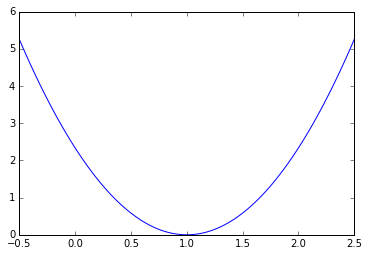

In [3]:
exp = sp.array([[1,1],[2,2],[3,3]])

theta = sp.linspace(-0.5, 2.5, 99)

J = simpj(theta,exp)

plt.plot(theta, J)

print('J is a minimum at theta = {:1}' .format(theta[J==min(J)][0]))

## Parameter Learning

### Gradient Descent
* The gradient descent is an algorithm used all over the place in machine learning
* This algorithm works for general problems up to $\theta_n$, but we are only looking at two variables for this explanation
* Adjust alpha to ensure the gradient descent converges in a reasonable time
* As a local minima is approached the gradient descent automatically takes smaller steps, no need to decrease $\alpha$ over time


Terminology
* := ~ Assignment, a := b -> set the value of a equal to b
* $\alpha$ ~ Learning rate, how big of steps are taken
* m ~ size of the training set


#### Gradient Descent Algorithm

Repeat until convergence:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1)$,

where $j=0,1$ represents the feature index number.


Correct: Simultaneous update
1. $temp0 := \theta_0 - \alpha \frac{\partial}{\partial\theta_0}J(\theta_0,\theta_1)$
2. $temp1 := \theta_1 - \alpha \frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1)$
3. $\theta_0 := temp0$
4. $\theta_1 := temp1$

#### Gradient Descent for Linear Regression
* aka "Batch" gradient descent, because you look at the entire training set as opposed to small subsets of the data.'
* Gradien descent scales better than the normal equations method

Repeat until convergence:

$$\begin{align}
\theta_0 := &\theta_0 - \alpha \frac{1}{m}\sum\limits^m_{i=1} (h_\theta(x_i) - y_i),\\
\theta_1 := &\theta_1 - \alpha \frac{1}{m}\sum\limits^m_{i=1} ((h_\theta(x_i) - y_i)x_i),\\
\end{align}$$

where $m$ is the size of the training set, $\theta_0$ a constant that will be changing simultaneously with $\theta_1$, and $x_i$, $y_i$ are values of the given training set (data).
